In [7]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [9]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_zip = tf.keras.utils.get_file('cats_and_dogs.zip', 
                                   origin=url, extract=True)
data_path = os.path.join(os.path.dirname(path_zip), 
                         'cats_and_dogs_filtered')

In [13]:
train_dir = os.path.join(data_path, 'train')
validation_dir = os.path.join(data_path, 'validation')

In [14]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True)
training_set = datagen.flow_from_directory(train_dir, 
                                           target_size=(64, 64), 
                                           batch_size=32, 
                                           class_mode='binary')


Found 2000 images belonging to 2 classes.


In [15]:
dataget1 = ImageDataGenerator(rescale=(1./255))
test_set = dataget1.flow_from_directory(validation_dir, 
                                       target_size=(64, 64),
                                       batch_size=32,
                                       class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [18]:
from tensorflow.keras.regularizers import l2

In [25]:
cnn = tf.keras.Sequential()

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same',
                              kernel_size=3, activation='relu', 
                               strides=2, input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', 
                               kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),
              activation='linear'))

In [27]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 128)              

In [28]:
cnn.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

In [29]:
r = cnn.fit(x=training_set, validation_data=test_set, epochs=15)

Epoch 1/15
63/63 [==============================] - 22s 321ms/step - loss: 1.0084 - accuracy: 0.5160 - val_loss: 0.9319 - val_accuracy: 0.6220
Epoch 2/15
63/63 [==============================] - 7s 115ms/step - loss: 0.8619 - accuracy: 0.5855 - val_loss: 0.7978 - val_accuracy: 0.6480
Epoch 3/15
63/63 [==============================] - 7s 105ms/step - loss: 0.7641 - accuracy: 0.6320 - val_loss: 1.0170 - val_accuracy: 0.6020
Epoch 4/15
63/63 [==============================] - 7s 104ms/step - loss: 0.7352 - accuracy: 0.6595 - val_loss: 0.7059 - val_accuracy: 0.7010
Epoch 5/15
63/63 [==============================] - 7s 105ms/step - loss: 0.6767 - accuracy: 0.6990 - val_loss: 0.6914 - val_accuracy: 0.7000
Epoch 6/15
63/63 [==============================] - 7s 104ms/step - loss: 0.6726 - accuracy: 0.6965 - val_loss: 0.6828 - val_accuracy: 0.6960
Epoch 7/15
63/63 [==============================] - 7s 104ms/step - loss: 0.6562 - accuracy: 0.7125 - val_loss: 0.6798 - val_accuracy: 0.7100
Epoch

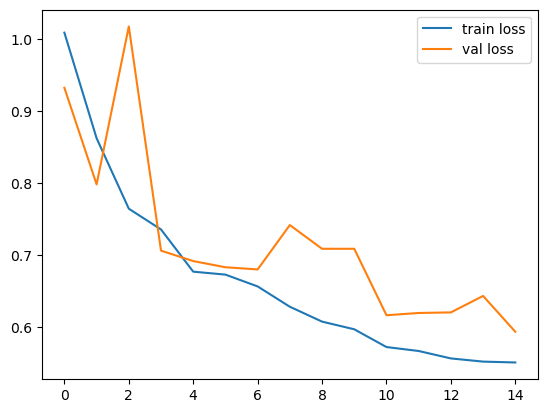

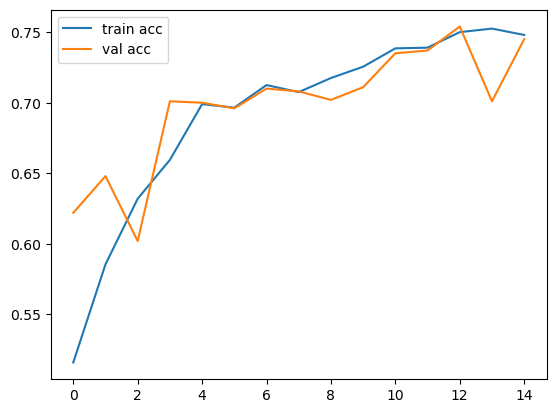

In [30]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [31]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

In [32]:
from tensorflow.keras.preprocessing import image

In [ ]:
test_image = image.load_img('', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")